# 1. Matriu de confusió

Respon els apartats a, b i c sobre el codi següent.

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


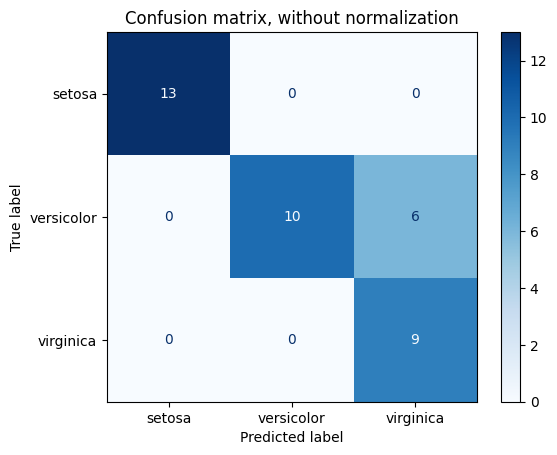

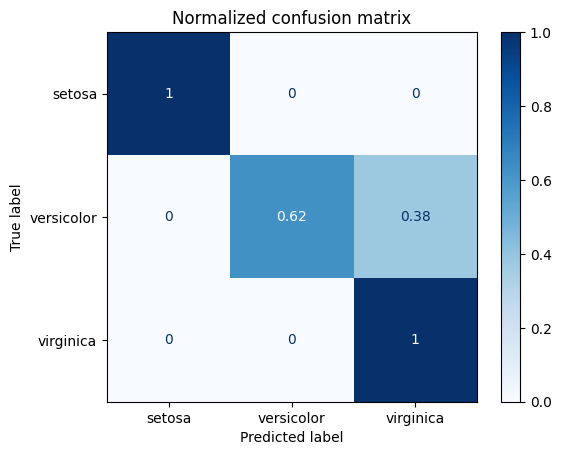

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

a) Afegeix codi que mostri quina és la mida dels conjunts d'entrenament i validació.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Mostrar tamaños
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 112
Tamaño del conjunto de validación: 38


b) Quin model de classificació s'està usant?

Se está usando el modelo de clasificación SVM (Support Vector Machine)

c) De quin càlcul surten els nombres 0.62 i 0.38?

El cálculo se hace normalizando por filas, es decir, dividiendo cada valor de la fila por la suma total de la fila.

Para la segunda fila:  
  •	La suma total es 10 + 6 = 16.  
	•	0.62 se obtiene de 10 / 16.  
	•	0.38 se obtiene de 6 / 16.  

d) Modifica els valors dels vectors **y_true** i **y_pred**, sense canviar la longitud dels vectors, de forma que els **falsos positius** (fp) augmentin en una unitat i els **veritables negatius** (tn) davallin una unitat.

In [ ]:
from sklearn.metrics import confusion_matrix # Import the confusion_matrix functio

y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 3, 3)

### Valores modificados para aumentar una unidad los FP y bajar una unidad los TN

In [ ]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 0, 1, 0, 1, 0]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(1, 2, 3, 3)

# 2. Corba ROC

In [ ]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["virginica"])

array([[0, 1, 0]])

In [ ]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

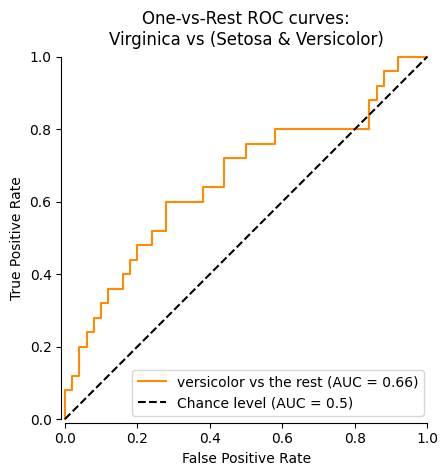

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

a) Explicau el significat de la línia negra discontínua, de pendent 1.

La línea negra discontinua con pendiente 1 en la curva ROC representa el rendimiento de un modelo aleatorio.

Es decir, si un modelo clasificara aleatoriamente, la probabilidad de predecir correctamente un positivo sería la misma que un negativo, es por eso que el resultado es una línea diagonal con pendiente 1.

b) Obteniu el valor i el gràfic de l'àrea sota la corba per a la classe "setosa", amb les etiquetes corresponents.

In [ ]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["setosa"])

array([[1, 0, 0]])

In [ ]:
class_of_interest = "setosa"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

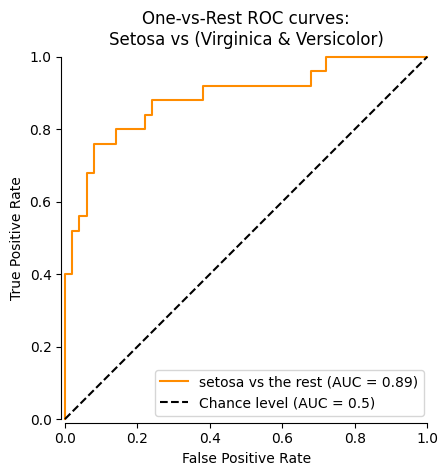

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nSetosa vs (Virginica & Versicolor)",
)

c) Obteniu el valor i el gràfic de l'àrea sota la corba de la classe "virginica", amb les etiquetes corresponents.

In [ ]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
(
    X_train,
    X_test,
    y_train,
    y_test,
) = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform(["virginica"])

array([[0, 0, 1]])

In [ ]:
class_of_interest = "virginica"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

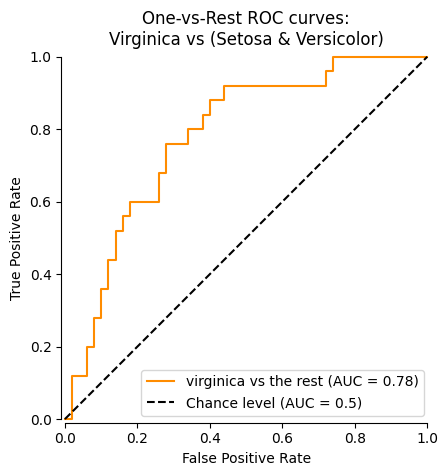

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)",
)

d) Ordenau les tres classes per qualitat de classificació, d'acord amb la seva àrea sota la corba.

In [ ]:
from sklearn.metrics import roc_auc_score

# Calcular el AUC para cada clase y guardarlo en una lista
auc_setosa = roc_auc_score(y_onehot_test[:, 0], y_score[:, 0])
auc_versicolor = roc_auc_score(y_onehot_test[:, 1], y_score[:, 1])
auc_virginica = roc_auc_score(y_onehot_test[:, 2], y_score[:, 2])

# Crear un diccionario con los resultados
auc_scores = {
    "setosa": auc_setosa,
    "versicolor": auc_versicolor,
    "virginica": auc_virginica
}

# Ordenar las clases por AUC
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

# Mostrar el resultado
print("Clases ordenadas por calidad de clasificación (AUC):")
for class_name, auc in sorted_auc:
    print(f"{class_name}: {auc:.3f}")

Clases ordenadas por calidad de clasificación (AUC):
setosa: 0.887
virginica: 0.780
versicolor: 0.661


# 3. Corbes de validació

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 3),
)
train_scores
valid_scores

array([[0.9       , 0.9       , 0.9       , 0.96666667, 0.9       ],
       [0.9       , 0.83333333, 0.96666667, 0.96666667, 0.93333333],
       [1.        , 0.93333333, 1.        , 1.        , 0.9       ]])

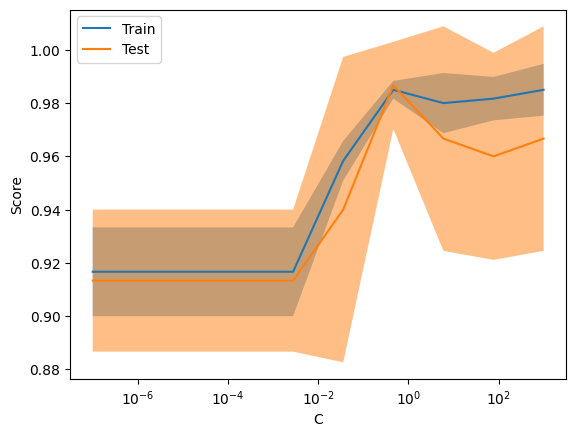

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)

a) A la corba de validació anterior, modificau el codi perquè en lloc de potències de deu, mostri el resultat per a potències de 2, en un rang similar.

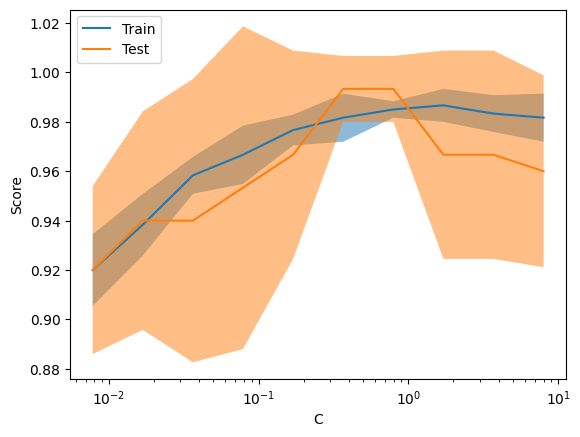

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)

param_range = np.power(2, np.linspace(-7, 3, 10))

ValidationCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, param_name="C", param_range=param_range
)

b) Quin és en aquest cas el punt d'equilibri entre infraajust i sobreajust?

En ambos gráficos el punto de equilibrio se encuentra aproximadamente en 10e0

# 4. Regressió

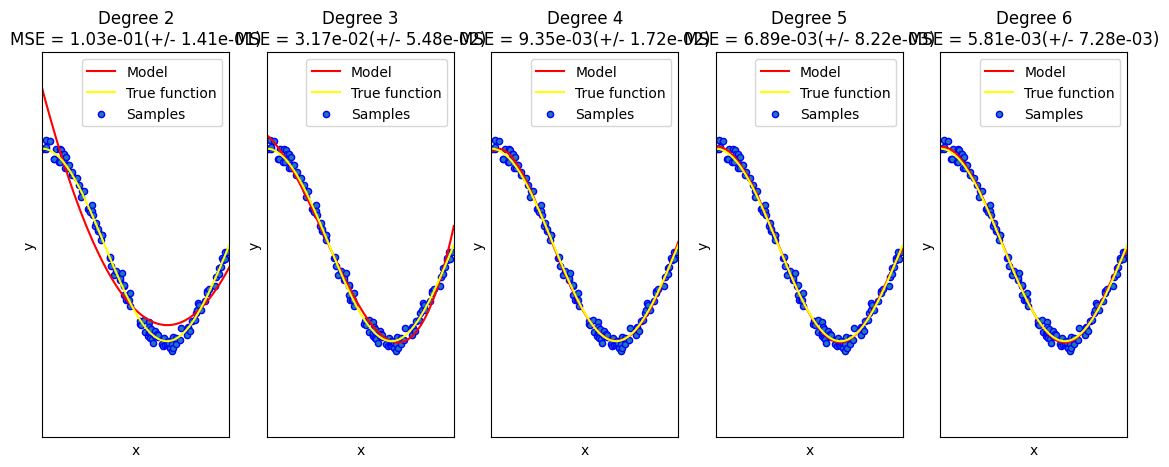

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 120
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color="red")
    plt.plot(X_test, true_fun(X_test), label="True function", color="yellow")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

a) Quan els graus dels polinomis són 1,4 i 15 està clar que el millor ajust es produeix per al grau 4. Ara bé, afinem una mica més al voltant de 4. Per això, modificau el vector de graus perquè contengui els valors 2, 3, 4, 5,6.

b) Quin és en aquest cas el grau que obté un valor més baix d'error quadràtic mitjà? Quin és aquest valor?

El grado que obtiene el valor más bajo de error cuadrático medio es el grado 6. Este valor representa la diferencia entre las predicciones del modelo y los datos reales. Un error cuadrático más bajo indica un mejor ajuste del modelo a los datos, es decir, que el modelo está siendo más preciso al intentar predecir los valores reales.

c) Correspon amb el gràfic més ajustat entre les corbes blava i taronja?

Sí, corresponde correctamente con el gráfico en la relación entre la línea azul y naranja

d) Duplicau el nombre de mostres preses (n_samples). En aquest cas coincideixen l'error quadràtic mitjà i les corbes més coincidents? Per a quin grau del polinomi?

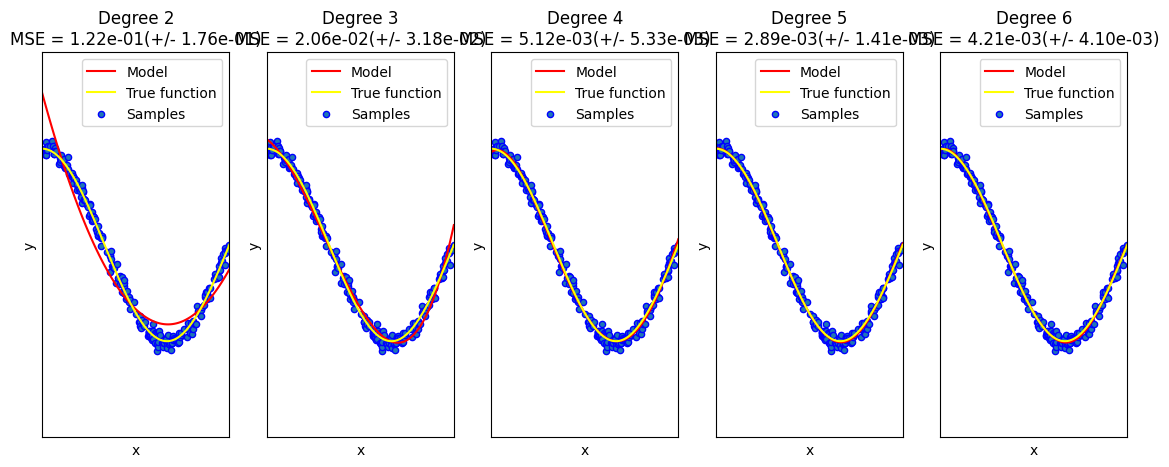

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 240
degrees = [ 2, 3, 4, 5, 6]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.05

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color="red")
    plt.plot(X_test, true_fun(X_test), label="True function", color="yellow")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

En este caso las curvas más coincidentes en mi opinión están en los grados 5 y 6 por igual. Vemos además que son los grados con el error cuadrático más bajo por lo tanto sí que coincide el error cuadrático bajo con las curvas coincidentes sin embargo no sabría decir a simple vista cuáles de los gráficos se ajusta mejor